# 1 - Introduction au Deep Learning avec Keras 


Nous allons à présent nous pencher sur un exemple de modèle de Perceptron multicouche sur le Dataset bien connu IRIS. 
- Pour rappel, ce jeu de données est le plus réputé pour des projets de reconnaissance d'espèces. Il contient des informations visuelles sur 3 espèces d'iris décrites par 50 observations chacunes.    
L'objectif est donc de reconnaître la fleur d'iris à partir de certaines mesures caractéristiques regroupées dans des données tabulaires.

(a) Exécuter la cellule suivante pour importer les packages nécéssaires :

In [1]:
import numpy as np # Pour la manipulation de tableaux

import pandas as pd # Pour manipuler des DataFrames pandas

import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

from tensorflow.keras.layers import Input, Dense #Pour instancier une couche Dense et une d'Input
from tensorflow.keras.models import Model

In [2]:
import tensorflow
tensorflow.__version__  # versions 2.9.1 pour moi et pour eux 2.0.0

'2.18.0'

In [3]:
import tensorflow as tf
import random
import os

def fix_random_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

# Appliquer la seed fixée
fix_random_seed(42)

In [ ]:
#lien de la data sur github
url = "https://raw.githubusercontent.com/Fred-Zang/AJC-Deep_Learning_fondamentaux/refs/heads/main/iris.csv"
df = pd.read_csv(url, header=None, skiprows=1)

# sinon iris.csv placé sur le dossier de travail faire plutot
# df = pd.read_csv("iris.csv", header=None, skiprows=1)

# définir les bons noms de colonnes
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

print(df.info())
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1
31,5.4,3.4,1.5,0.4,0
64,5.6,2.9,3.6,1.3,1
141,6.9,3.1,5.1,2.3,2
68,6.2,2.2,4.5,1.5,1
82,5.8,2.7,3.9,1.2,1


## Graph explicatif

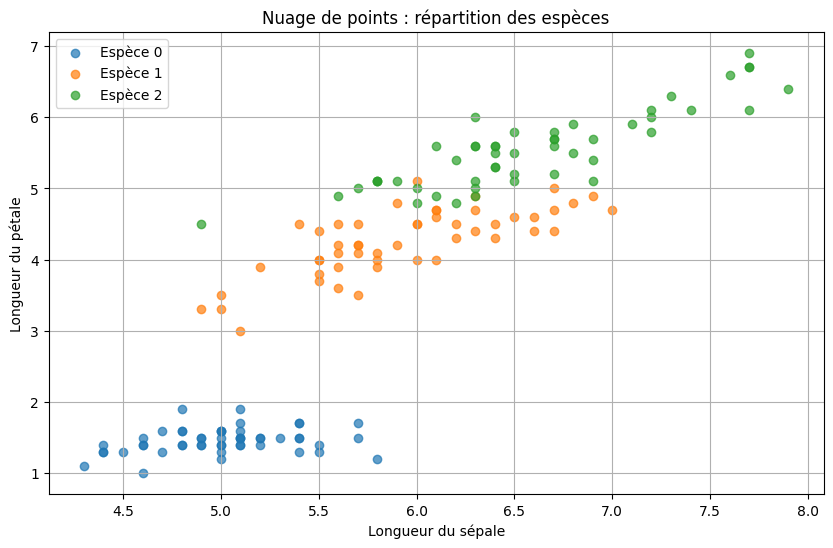

In [5]:
# Création du nuage de points
plt.figure(figsize=(10, 6))

# MODIFICATION : boucle pour afficher les 3 classes avec des couleurs différentes
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(
        subset['sepal_length'],
        subset['petal_length'],
        label=f"Espèce {species}",
        alpha=0.7
    )

plt.xlabel("Longueur du sépale")
plt.ylabel("Longueur du pétale")
plt.title("Nuage de points : répartition des espèces")
plt.legend()
plt.grid(True)
plt.show()

- Séparer les variables explicatives de la variable cible.


In [6]:
#Splitting the data into training and test test
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values



- (e) Séparer les données en un jeu d'entraînement et test. Le jeu de test pèsera pour un tiers du jeu de données.

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# <span style="color:orange;">Multi Layer Perceptron</span> MLP ANN

Le modèle Perceptron multicouche est une séquence de couches Perceptron dont l'entrée est la sortie de la couche précédente.

Considérons un <span style="color:green;">modèle Perceptron à 3 couches</span>. Pour un vecteur d'entrée donné  x , la sortie de la première couche est :

- H1=Layer1(x)

 
Ensuite, le vecteur  H1H1  est donné en entrée à la deuxième couche :

- H2=Layer2(H1)

 
Enfin, le vecteur  H2H2  est donné en entrée à la troisième couche pour obtenir la sortie finale du modèle :

- O=Layer3(H2)


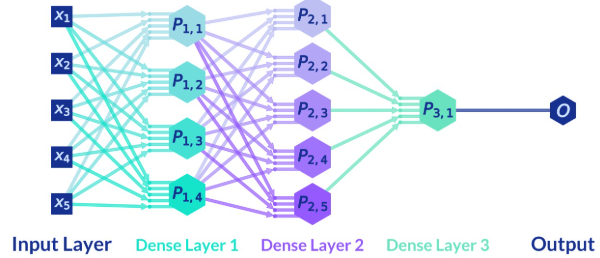

Les perceptrons multicouches peuvent être construits <span style="color:orange;">**sequentiellement**</span> en empilant les couches denses les unes après les autres. Vous rencontrerez parfois cette écriture dans Keras, même si dans ce module nous avons décidé d'utiliser la construction <span style="color:orange;">**fonctionnelle**</span> qui est plus polyvalent et qui s'utilise d'avantage quand on écrit des modèles complexes pouvant avoir une structure non linéaire ou prendre différents inputs.

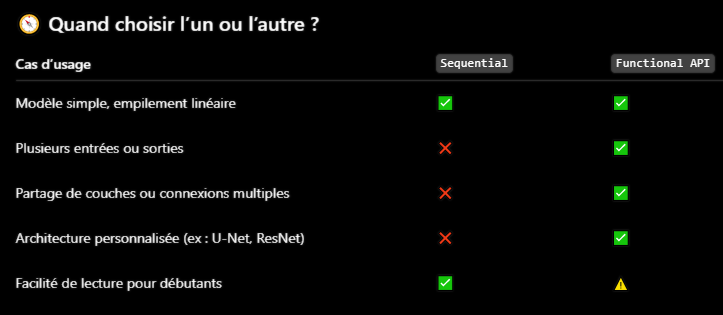

## <span style="color:yellow;">Construction fonctionnelle</span> et Entraînement d'un modèle
Nous allons construire notre modèle en ajoutant couche par couche depuis la couche d'entrée jusqu'à la couche de sortie.

La construction d'un modèle avec Keras se fait très facilement avec les étapes suivantes:

- <span style="color:green;">Étape 1</span> : Importer les classes Input, Dense et la classe Model de la librairie Keras

- <span style="color:green;">Étape 2</span> : Instancier une couche d'entrée qui contient les dimensions de nos données en entrée

- <span style="color:green;">Étape 3</span> : Instancier les couches qui composeront le modèle avec leur constructeur. 
   
- <span style="color:orange;">déclarer Input()</span> sert à définir la forme attendue des données d'entrée du modèle. C'est le point de départ de ton réseau de neurones.
   - Elle n'effectue aucun calcul, elle sert uniquement à déclarer la structure des données en entrée.
   - shape=(4,) signifie que chaque échantillon en entrée est un vecteur de 4 valeurs numériques : sepal length, sepal width, petal length, petal width

- <span style="color:orange;">déclarer les couches denses</span> :  
   - Le **nombre de neurones** dans une couche se définit avec le paramètre **units**.
   - Chaque couche apprend des représentations plus abstraites des données d'entrée.
   - En empilant les couches, le modèle peut apprendre des relations non linéaires et complexes.
   - chaque couche aura un nombre d'unit qui va diminuer : 10 puis 8 puis 6
   - Ces valeurs sont des choix empiriques. Il n’y a pas de règle absolue, mais quelques principes :
      - Plus d'unités → plus de capacité d’apprentissage, mais aussi plus de risque d’overfitting.
      - On diminue souvent le nombre d'unités au fur et à mesure (forme d’entonnoir vers la sortie).
      - Ici, on commence par 10 (beaucoup de combinaisons possibles), puis tu affines (8, puis 6).

  - <span style="color:orange;">activation="tanh"</span> ?
    - tanh est une fonction d’activation non-linéaire. Elle transforme les sorties de chaque neurone.
    - Caractéristiques de tanh :
        - Sortie comprise entre –1 et +1.
        - Centrée sur zéro (contrairement à sigmoid).
        - Aide le réseau à apprendre plus vite dans certains cas.
        - Elle est souvent utilisée dans les réseaux simples ou petits. Pour les gros réseaux, on préfère parfois ReLU.

- <span style="color:orange;">finir par une couche Dense(units=3, activation="softmax")</span>
   - Pourquoi units = 3 ? car le dataset iris contient 3 classes : setosa, versicolor, virginica
   - Pourquoi activation="softmax" ?
      - softmax est utilisée en classification multi-classe. Elle transforme les 3 sorties du réseau en probabilités :
      - La somme des 3 sorties est toujours égale à 1.
      - La classe prédite sera celle avec la plus grande probabilité.
      - C’est la meilleure activation pour une sortie multi-classe, combinée à la perte sparse_categorical_crossentropy si tes classes sont encodées en entiers (0, 1, 2).


In [8]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# déclarer Input()
inputs = Input(shape = (4,), name = "Input")

# déclarer les couches denses
dense1 = Dense(units = 10, activation = "tanh", name = "Dense_1")
dense2 = Dense(units = 8, activation = "tanh", name = "Dense_2")
dense3 = Dense(units = 6, activation = "tanh", name = "Dense_3")
dense4 = Dense(units = 3, activation = "softmax", name = "Dense_4") # couche de sortie

- (f) Comme nous sommes dans une construction **fonctionnelle**, il faut appliquer une à une les différentes couches du modèle en précisant que la première couche prendra en entrée l'input et l'output correspondra à l'application de la derniere couche Dense.
- Puis Appliquer les couches une à une (construction fonctionnelle).
x = dense1(inputs)
x = dense2(x)
...

In [9]:
# Appliquer les couches une à une (loi de composition)
x=dense1(inputs)
x=dense2(x)
x=dense3(x)
outputs=dense4(x)

- Les commandes suivantes permettent de finaliser la définition du modèle et d'en afficher la structure.

In [10]:
# finaliser la définition du modèle et afficher sa structure
model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_4 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

## approche Séquentielle (pour info)

``` python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# MODIFICATION : Définir le modèle séquentiel
model = Sequential(name="Model_sequentiel")

# MODIFICATION : Ajouter les couches dans le même ordre que l'approche fonctionnelle
model.add(Dense(units=10, activation='tanh', input_shape=(4,), name='Dense_1'))
model.add(Dense(units=8, activation='tanh', name='Dense_2'))
model.add(Dense(units=6, activation='tanh', name='Dense_3'))
model.add(Dense(units=3, activation='softmax', name='Dense_4'))

# Afficher le résumé du modèle
model.summary()
```
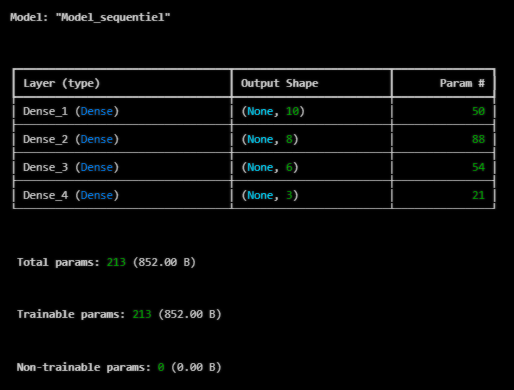

- (g) Compiler le modèle, avec comme fonction de perte: **"sparse_categorical_crossentropy"**, adaptée à la classification à multi-classe. Définir l'optimiseur : **"adam"** et la métrique : **["accuracy"]**

In [11]:
# préparer le modèle pour l'entraînement.
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

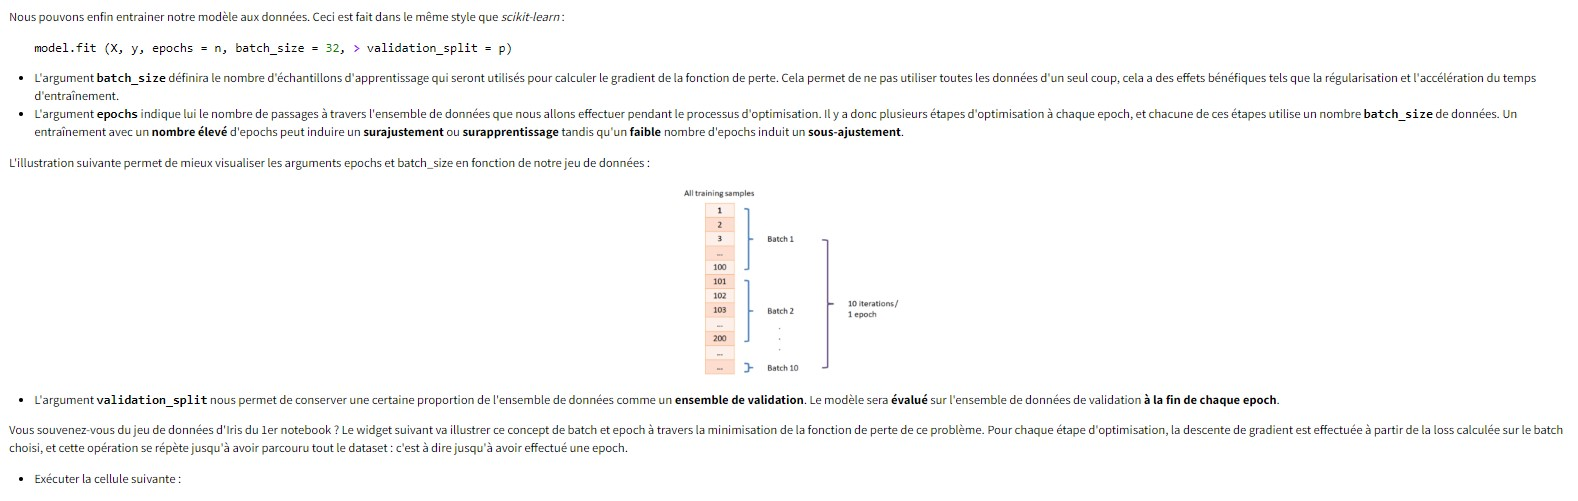

- (h) Entraîner le modèle sur «X_train» et «y_train» pour les epochs 500 avec une taille de lot de 32 échantillons et sur les données de test.

In [12]:
historic = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.3537 - loss: 1.2037 - val_accuracy: 0.3200 - val_loss: 1.2017
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3537 - loss: 1.1776 - val_accuracy: 0.3200 - val_loss: 1.1783
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3537 - loss: 1.1565 - val_accuracy: 0.3200 - val_loss: 1.1567
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3537 - loss: 1.1370 - val_accuracy: 0.3200 - val_loss: 1.1361
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3537 - loss: 1.1184 - val_accuracy: 0.3200 - val_loss: 1.1164
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3537 - loss: 1.1007 - val_accuracy: 0.3200 - val_loss: 1.0972
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3537 - loss: 1.0836 - val_accuracy: 0.3200 - val_loss: 1.0786
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3537 - loss: 1.0669 - val_accuracy: 0.3200 - val_loss:

# Performances du modèle
Nous voulons maintenant effectuer un diagnostic de notre modèle. Pour cela, nous allons calculer une matrice de confusion sur l'échantillon de test.

Néanmoins, si nous essayons de prédire la classe de l'échantillon de test, la méthode **predict* du modèle renvoie un **vecteur de probabilités** où chaque élément est la probabilité d'appartenance à la classe correspondant à son indice.

Pour utiliser la fonction classification_report du sous-module metrics de scikit-learn, il faut que le vecteur de la prédiction et le vecteur de la classe réelle soient composés d'entiers.

Nous allons alors utiliser la méthode **argmax** d'un array numpy pour savoir à quelle classe correspondent les vecteurs binaires et les vecteurs de probabilites.

- (a) Prédire les classes de l'échantillon **X_test** à l'aide de la méthode predict du modèle. Stocker le résultat dans un tableau nommé **test_pred**.
- (b) Appliquer la méthode argmax sur les tableaux **test_pred** pour obtenir des vecteurs d'entiers correspondant aux classes prédites et réelles. Il faudra passer l'argument 'axis = 1' pour que l'argmax soit calculée sur les colonnes et non les lignes. Stocker les sorties des appels de la méthode argmax dans un tableau nommés **test_pred_class** et les valeurs réelles dans **y_test_class**.

In [13]:
test_pred = model.predict(X_test)


y_test_class = y_test
y_pred_class = np.argmax(test_pred,axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step 


- (c) Afficher un compte-rendu évaluatif détaillé de la perfomance du modèle grâce à la fonction classification_report du sous-module metrics de scikit-learn.

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


## Graph des performances

In [15]:
# recherche des clés de historic pour notre graphe
print(historic.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


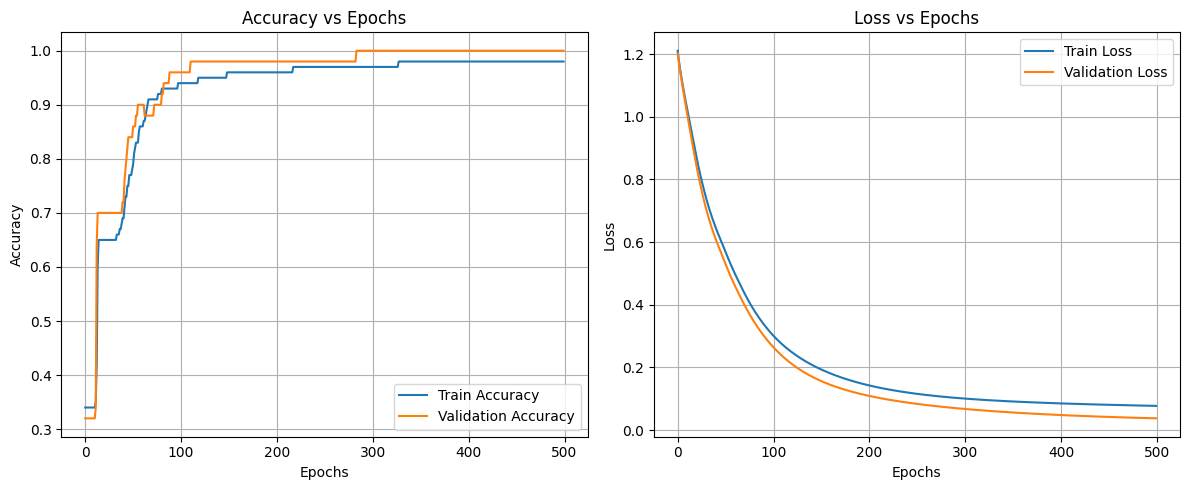

In [16]:
import matplotlib.pyplot as plt


# Tracer les courbes d'accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(historic.history["accuracy"], label="Train Accuracy")
plt.plot(historic.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.grid(True)

# Tracer les courbes de perte
plt.subplot(1, 2, 2)
plt.plot(historic.history["loss"], label="Train Loss")
plt.plot(historic.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Analyse des performances

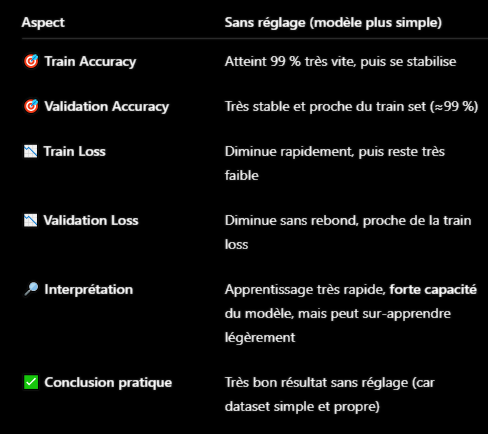

## Test plus complet avec dropout() et EarlyStopping()

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 📥 Chargement des données
df = pd.read_csv("iris.csv", header=None, skiprows=1)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# 🧠 Définition du modèle régularisé
# moins de neurones en couches => moins de poids à apprendre
# dropout() = technique de régularisation : désactive aléatoirement x % des neurones d'une couche
            # Le réseau n’a pas accès à 100 % de sa mémoire à chaque passe.
            # Cela l’empêche de se reposer trop sur certains neurones.
            # Il doit mieux répartir l’apprentissage dans tout le réseau.
            # Cela réduit la variance, donc évite le surapprentissage.
            
inputs = Input(shape=(4,), name="Input")
x = Dense(8, activation="tanh", name="Dense_1")(inputs) # 1er couche avec 8 neurones au lieu de 10
x = Dropout(0.2, name="Dropout_1")(x) # déactiver 20% de la couche précédente
x = Dense(6, activation="tanh", name="Dense_2")(x)  # 2eme couche avec 6 neurones au lieu de 8 (on a éliminé en effet la 1ere couche à 10 neurones d'avant)
x = Dropout(0.2, name="Dropout_2")(x) # déactiver 20% de la couche précédente
outputs = Dense(3, activation="softmax", name="Output")(x)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

# ⚙️ Compilation
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# ⏱️ Callback pour early stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# 🚀 Entraînement
historic = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=2 # évite le tremblement de cellule jupyter quand le fit est lancé sur les epochs -> Affichage clair, 1 ligne par epoch, sans animation"
)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
7/7 - 2s - 234ms/step - accuracy: 0.3200 - loss: 1.5431 - val_accuracy: 0.3800 - val_loss: 1.3104
Epoch 2/500
7/7 - 0s - 13ms/step - accuracy: 0.3000 - loss: 1.3849 - val_accuracy: 0.3800 - val_loss: 1.2671
Epoch 3/500
7/7 - 0s - 11ms/step - accuracy: 0.3300 - loss: 1.3627 - val_accuracy: 0.3800 - val_loss: 1.2279
Epoch 4/500
7/7 - 0s - 12ms/step - accuracy: 0.3000 - loss: 1.2846 - val_accuracy: 0.3800 - val_loss: 1.1912
Epoch 5/500
7/7 - 0s - 11ms/step - accuracy: 0.3000 - loss: 1.3220 - val_accuracy: 0.3800 - val_loss: 1.1572
Epoch 6/500
7/7 - 0s - 11ms/step - accuracy: 0.3100 - loss: 1.3017 - val_accuracy: 0.3800 - val_loss: 1.1255
Epoch 7/500
7/7 - 0s - 11ms/step - accuracy: 0.3300 - loss: 1.2236 - val_accuracy: 0.3800 - val_loss: 1.0946
Epoch 8/500
7/7 - 0s - 10ms/step - accuracy: 0.4400 - loss: 1.1487 - val_accuracy: 0.3800 - val_loss: 1.0678
Epoch 9/500
7/7 - 0s - 11ms/step - accuracy: 0.3600 - loss: 1.1859 - val_accuracy: 0.3800 - val_loss: 1.0440
Epoch 10/500
7/7 -

In [18]:
# performances du modèle
test_pred = model.predict(X_test)


y_test_class = y_test
y_pred_class = np.argmax(test_pred,axis=1)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


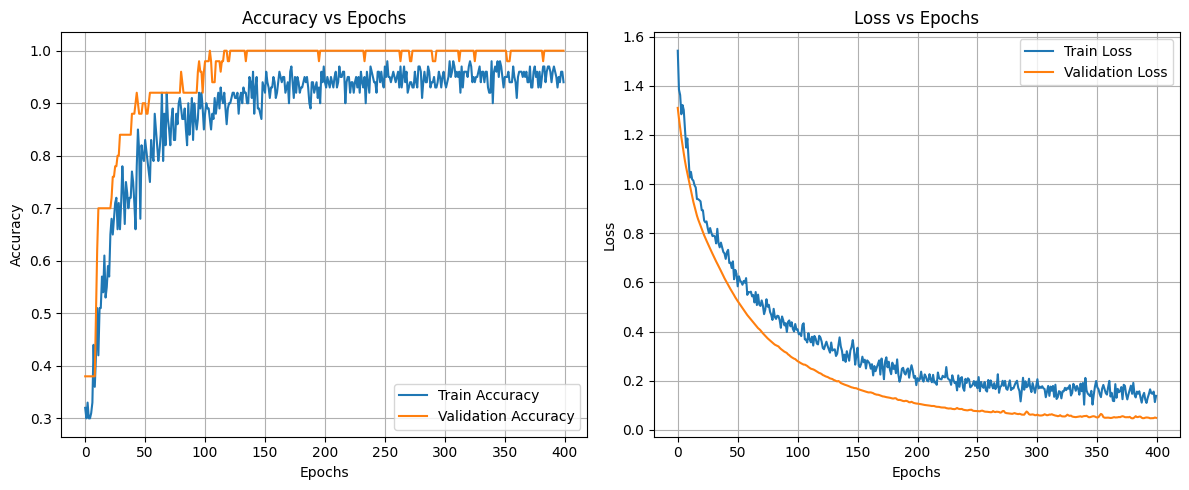

In [19]:
import matplotlib.pyplot as plt

# Tracer les courbes d'accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(historic.history["accuracy"], label="Train Accuracy")
plt.plot(historic.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.grid(True)

# Tracer les courbes de perte
plt.subplot(1, 2, 2)
plt.plot(historic.history["loss"], label="Train Loss")
plt.plot(historic.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


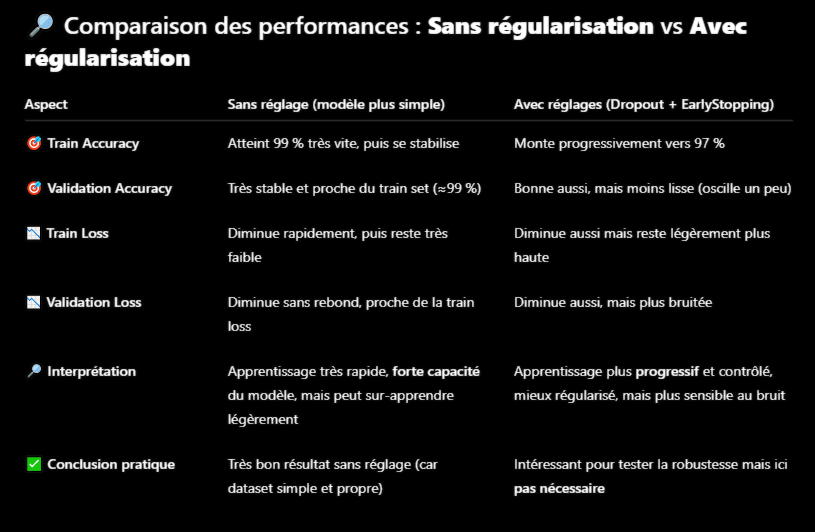
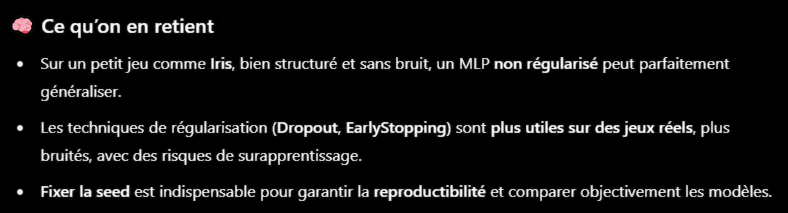